In [1]:
#!/usr/bin/env python
#
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#

Define the multivariate Gaussian PDF function

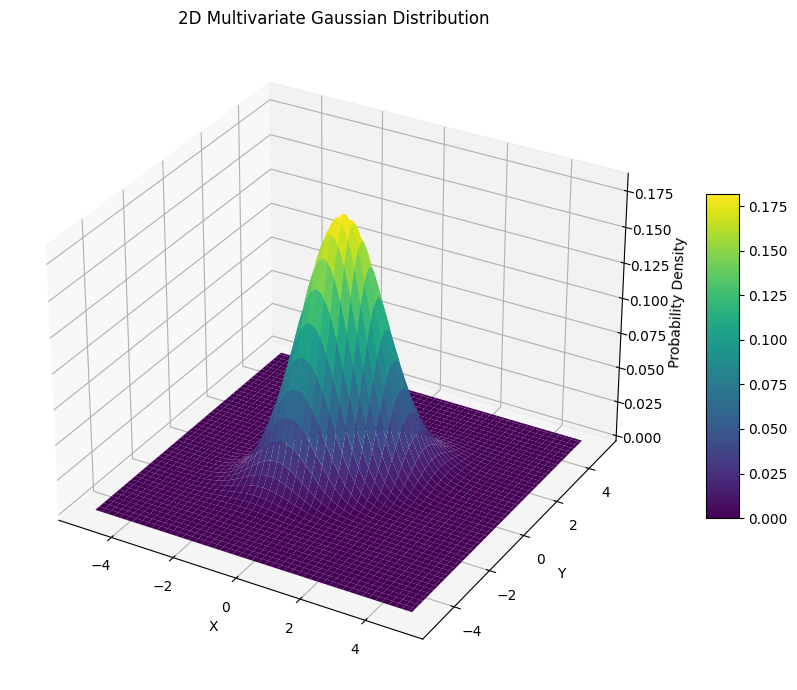

In [2]:
def multivariate_gaussian(x, μ, Σ):
	Զπ = 2*np.pi
	ӏΣӏ = np.linalg.det(Σ)  
	Σˉᣳ = np.linalg.inv(Σ)
	n = len(μ)  # Dimensionality
#
	# Normalization constant
	s = 1 / (Զπ**(n / 2) * ӏΣӏ**(1/2))
#
	# Exponent term
	exponent = -0.5 * (x - μ).T.dot(Σˉᣳ).dot(x - μ)
#
	# Compute the PDF
	pdf = s * np.exp(exponent)
	return pdf
#
# Define the μ vector and Covariance matrix
μ = np.array([0, 0])  # Mean vector [mu_x, mu_y]
Σ = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix
#
# Create a grid of points in 2D space
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
Y, X = np.meshgrid(x, y)
pos = np.dstack((X, Y))  # Combine X and Y into a 2D grid
#
# Compute the multivariate Gaussian PDF at each point on the grid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
	for j in range(X.shape[1]):
		Z[i, j] = multivariate_gaussian(np.array([X[i, j], Y[i, j]]), μ, Σ)
#
# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
#
# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
#
# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('2D Multivariate Gaussian Distribution')
#
# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
#
# Show the plot
plt.tight_layout()
plt.show()